In [7]:
import pandas as pd
import numpy as np

def get_ind_size():
    ind = pd.read_csv("./data/ind30_m_size.csv",header=0,index_col=0,parse_dates=True)/100
    ind.index = pd.to_datetime(ind.index,format = "%Y%m").to_period('M')
    ind.columns = [column.strip() for column in ind.columns ]
    return ind

ind_size = get_ind_size()

def get_ind_nfirms():
    ind = pd.read_csv("./data/ind30_m_nfirms.csv",header=0,index_col=0,parse_dates=True)/100
    ind.index = pd.to_datetime(ind.index,format = "%Y%m").to_period('M')
    ind.columns = [column.strip() for column in ind.columns ]
    return ind


ind_nfirms = get_ind_nfirms()


def get_ind_returns():
    ind = pd.read_csv("./data/ind30_m_vw_rets.csv",header=0,index_col=0,parse_dates=True)/100
    ind.index = pd.to_datetime(ind.index,format = "%Y%m").to_period('M')
    ind.columns = [column.strip() for column in ind.columns ]
    return ind

ind_returns = get_ind_returns()

C:\Users\Neelesh Shukla\AppData\Local\Temp\ipykernel_2428\3175118235.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("./data/ind30_m_size.csv",header=0,index_col=0,parse_dates=True)/100
C:\Users\Neelesh Shukla\AppData\Local\Temp\ipykernel_2428\3175118235.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("./data/ind30_m_nfirms.csv",header=0,index_col=0,parse_dates=True)/100
C:\Users\Neelesh Shukla\AppData\Local\Temp\ipykernel_2428\3175118235.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("./data/ind30_m_vw_re

In [8]:
ind_returns.shape


(1110, 30)

In [9]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.154714,0.002136,0.095552,0.018487,0.002404,0.017816,0.022032,0.017864,0.097903,0.008034,...,0.175180,0.004080,0.039690,0.021210,0.495134,0.000238,0.153945,0.006492,0.022596,0.009700
1926-08,0.155230,0.002025,0.096752,0.019019,0.002666,0.017704,0.023796,0.018060,0.105621,0.008060,...,0.176635,0.004425,0.040418,0.022716,0.503126,0.000180,0.153681,0.006600,0.022656,0.010204
1926-09,0.159100,0.002574,0.102448,0.019110,0.002934,0.016944,0.023148,0.018711,0.111401,0.008723,...,0.180480,0.004515,0.041727,0.022092,0.525548,0.000190,0.152163,0.006564,0.023604,0.010884
1926-10,0.159702,0.002676,0.103072,0.020132,0.002884,0.016984,0.022836,0.018809,0.116399,0.008866,...,0.182080,0.004590,0.041664,0.020862,0.524142,0.000176,0.152295,0.006480,0.023232,0.010464
1926-11,0.154284,0.002586,0.104128,0.019166,0.003158,0.016112,0.022836,0.018578,0.110602,0.008892,...,0.181870,0.004467,0.041118,0.019680,0.508750,0.000148,0.148599,0.006198,0.022020,0.009576


<Axes: >

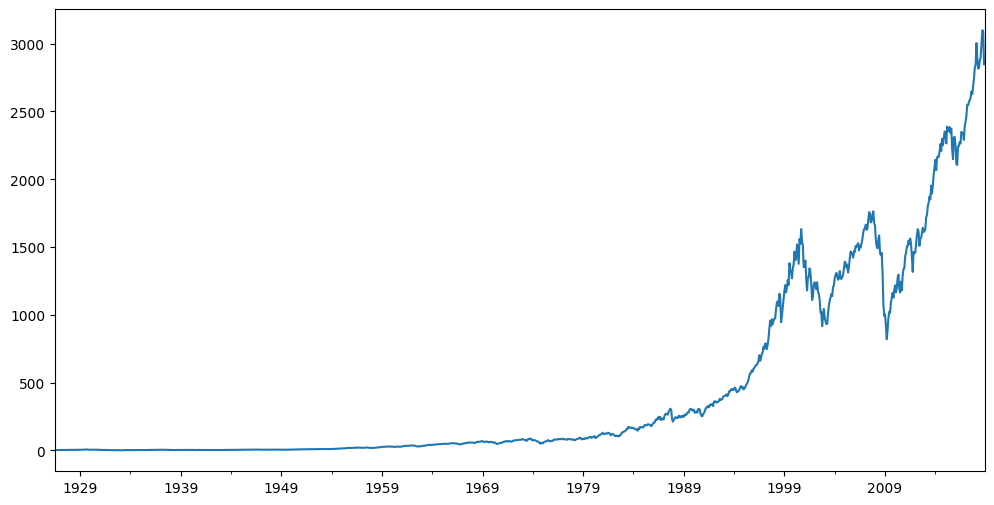

In [11]:
total_mktcap = ind_mktcap.sum(axis=1)
total_mktcap.plot(figsize=(12,6))

In [17]:
ind_capweight = ind_mktcap.divide(total_mktcap,axis="rows")
ind_capweight.head()
ind_capweight["1926":"1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

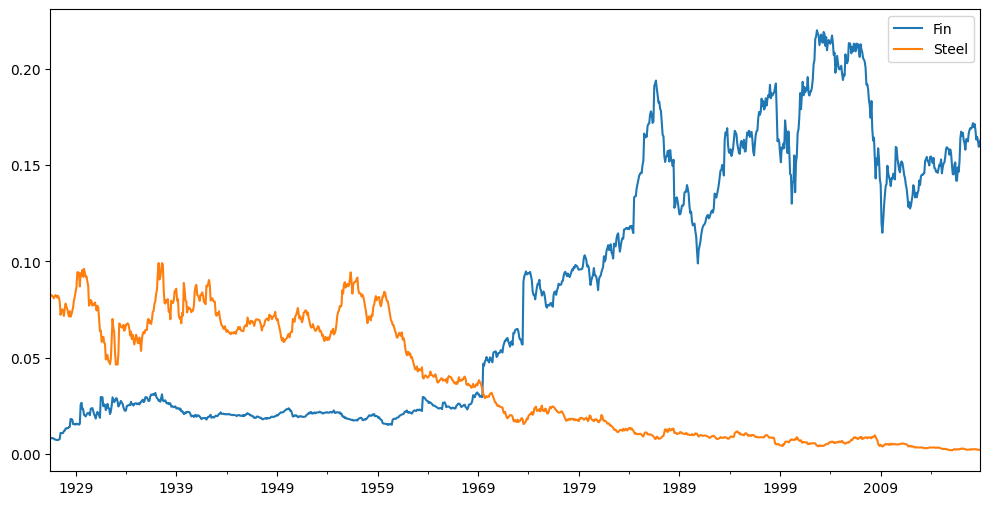

In [18]:
ind_capweight[['Fin','Steel']].plot(figsize=(12,6))

<Axes: >

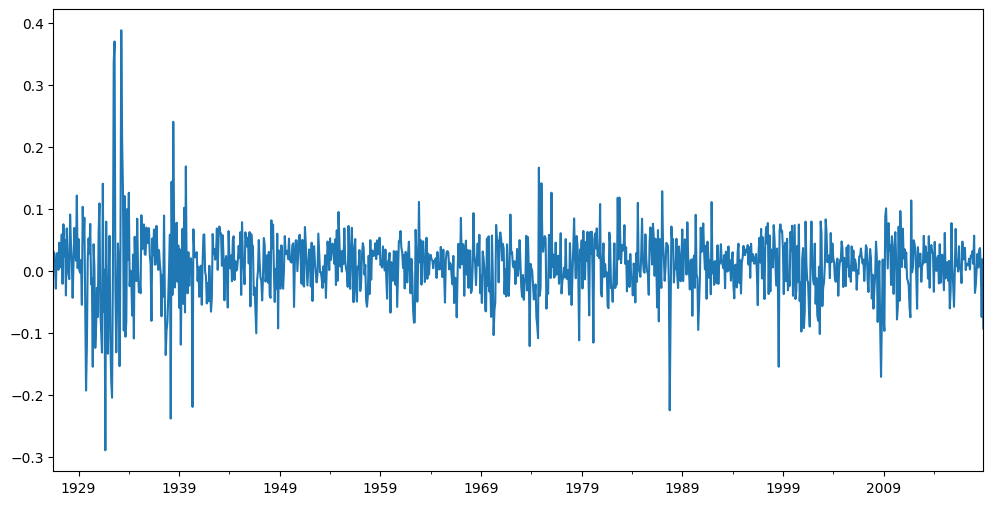

In [20]:
total_market_return = (ind_capweight*ind_returns).sum(axis="columns")
total_market_return.plot(figsize=(12,6))

<Axes: title={'center': 'Total Market Wealth Index 1926-2018'}>

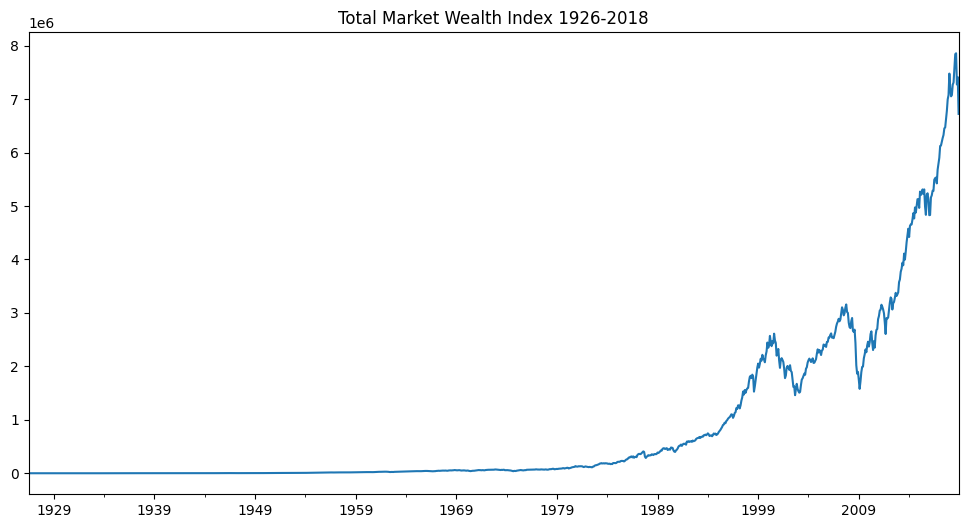

In [22]:
def drawdown(return_series:pd.Series):
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
            "Wealth":wealth_index,
            "Peaks":previous_peaks,
            "Drawdown":drawdowns
        })


total_market_index = drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(12,6),title="Total Market Wealth Index 1926-2018")

<Axes: >

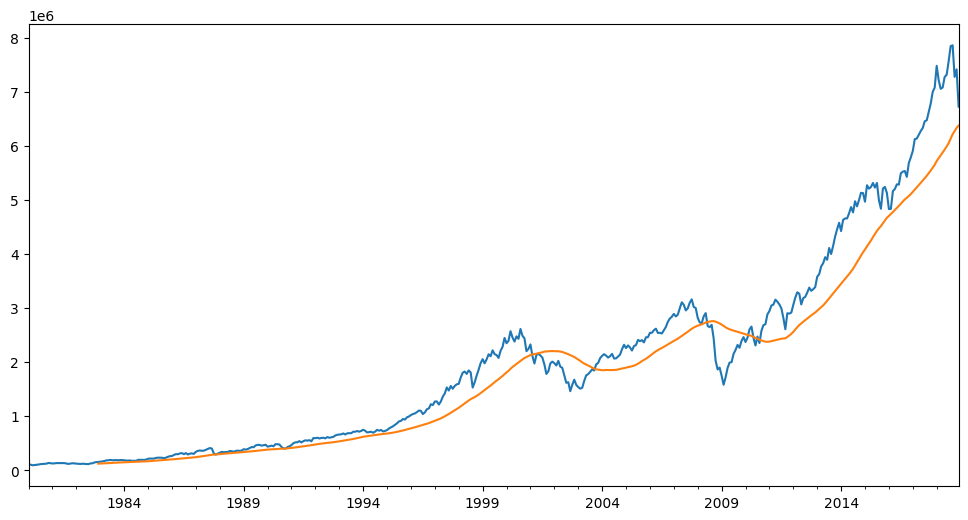

In [28]:
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(12,6))

In [29]:
def annualized_ret(r,periods_per_year):
    comp_grow = (1+r).prod()
    n_periods = r.shape[0]
    return comp_grow**(periods_per_year/n_periods) -1 
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(annualized_ret,periods_per_year=12)

<Axes: >

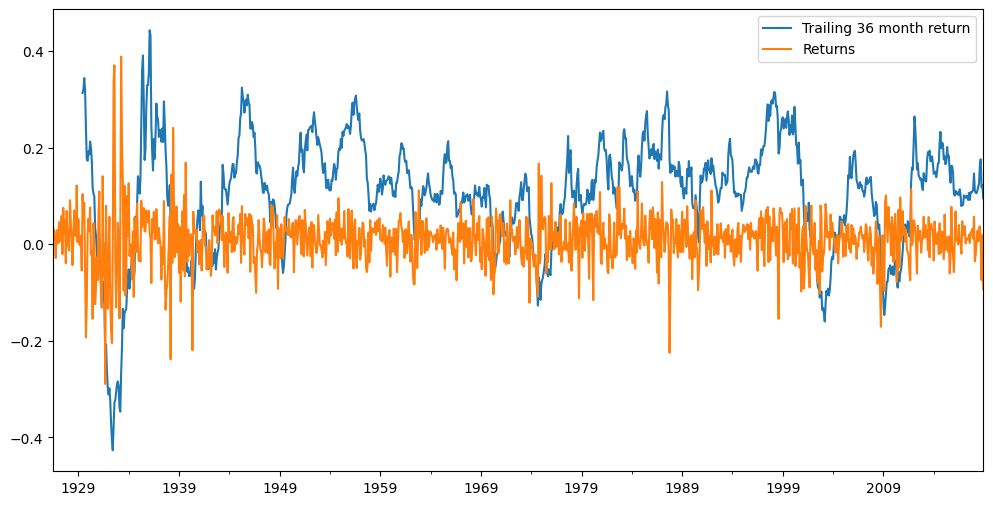

In [31]:
tmi_tr36rets.plot(figsize=(12,6),label="Trailing 36 month return",legend=True)
total_market_return.plot(label="Returns",legend=True)

In [36]:
ts_corr = ind_returns.rolling(window=36).corr().dropna()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [38]:
ts_corr.index.names = ['date','industry']
ts_corr.index.names

FrozenList(['date', 'industry'])

In [39]:
ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
1929-06 Food      1.000000  0.629628  0.596971  0.675709  0.281427  0.729475   
        Beer      0.629628  1.000000  0.346617  0.328484  0.349330  0.458642   
        Smoke     0.596971  0.346617  1.000000  0.317146  0.086412  0.424323   
        Games     0.675709  0.328484  0.317146  1.000000  0.198889  0.715495   
        Books     0.281427  0.349330  0.086412  0.198889  1.000000  0.174562   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
1929-06 Food      0.490230  0.676560  0.716603  0.617928  ...  0.623219   
        Beer      0.203686  0.532148  0.444421  0.640713  ...  0.426311   
        Smoke     0.155380  0.398125  0.452359  0.601743  ...  0.299186   
        Games     0.303105  0.513858  0.642301  0.439412  ...  0.550541   
        Books     0.435561  0.364148  0.114258  0.174108  ...  0.282757   
...                    ...       ...       ...       ...  ...       ...   
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
1929-06 Food      0.497310  0.660446  0.643028  0.735555  0.444707  0.795404   
        Beer      0.281562  0.350989  0.504010  0.504435  0.516265  0.426823   
        Smoke     0.337226  0.428761  0.192498  0.563923  0.254963  0.519246   
        Games     0.406675  0.319347  0.350967  0.529214  0.287682  0.534292   
        Books     0.139979  0.189726  0.308485  0.252343  0.028740  0.238301   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
1929-06 Food      0.684892  0.712037  0.724775  
        Beer      0.498461  0.526614  0.468640  
        Smoke     0.244318  0.461119  0.490210  
        Games     0.397446  0.663349  0.567514  
        Books     0.319734  0.293167  0.465276  
...                    ...       ...       ...  
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[32250 rows x 30 columns]

In [48]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr

date
1929-06    0.506684
1929-07    0.497322
1929-08    0.504564
1929-09    0.493901
1929-10    0.595306
             ...   
2018-08    0.416673
2018-09    0.401186
2018-10    0.409397
2018-11    0.403975
2018-12    0.479502
Freq: M, Length: 1075, dtype: float64

<Axes: >

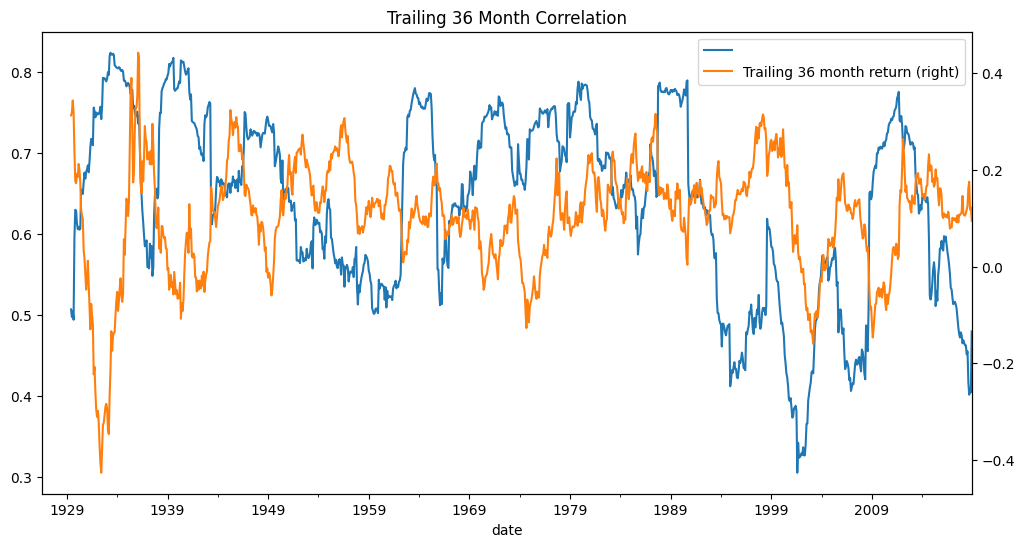

In [49]:
ind_tr36corr.plot(figsize=(12,6),title="Trailing 36 Month Correlation",legend=True)
tmi_tr36rets.plot(label="Trailing 36 month return",legend=True,secondary_y=True)

In [44]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884